<a href="https://colab.research.google.com/github/Ragul-11/Aiml_Project/blob/main/aiml_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#POTATO DISEASE CLASSIFICATION

##Import all necessary libraries


In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

### Set all the Constants

In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=10

### Import data into tensorflow dataset object

In [ ]:
!unzip /content/Potato_Dataset.zip

Archive:  /content/Potato_Dataset.zip
   creating: Potato_Dataset/
   creating: Potato_Dataset/Late_Blight/
  inflating: Potato_Dataset/.DS_Store  
  inflating: __MACOSX/Potato_Dataset/._.DS_Store  
   creating: Potato_Dataset/Healthy/
   creating: Potato_Dataset/Early_Blight/
  inflating: Potato_Dataset/Late_Blight/e3d4df7f-f184-453e-8a99-3cb0de5a2488___RS_LB 3959.JPG  
  inflating: __MACOSX/Potato_Dataset/Late_Blight/._e3d4df7f-f184-453e-8a99-3cb0de5a2488___RS_LB 3959.JPG  
  inflating: Potato_Dataset/Late_Blight/2ef5c4f6-a798-40fd-8380-f444f3290987___RS_LB 4428.JPG  
  inflating: __MACOSX/Potato_Dataset/Late_Blight/._2ef5c4f6-a798-40fd-8380-f444f3290987___RS_LB 4428.JPG  
  inflating: Potato_Dataset/Late_Blight/e766a563-c87a-4d14-ae00-898ce62e15d4___RS_LB 5123.JPG  
  inflating: __MACOSX/Potato_Dataset/Late_Blight/._e766a563-c87a-4d14-ae00-898ce62e15d4___RS_LB 5123.JPG  
  inflating: Potato_Dataset/Late_Blight/a6623827-bcdc-40ed-81e6-5cde1a1da997___RS_LB 3179.JPG  
  inflating: __MA

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Potato_Dataset",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [ ]:
class_names = dataset.class_names
class_names

['Early_Blight', 'Healthy', 'Late_Blight']

In [ ]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[0 2 0 2 2 0 2 0 0 2 0 2 2 0 2 2 2 0 0 2 0 0 2 0 2 0 1 2 0 2 2 2]


### Visualize some of the images from our dataset

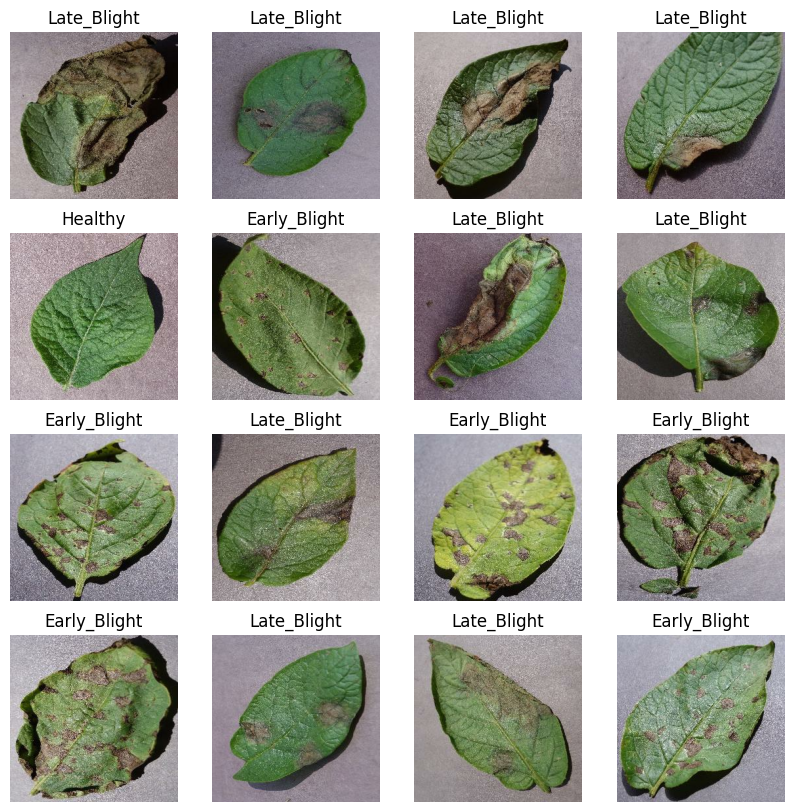

In [ ]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4,i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

### Function to Split Dataset

Dataset should be bifurcated into 3 subsets, namely:
1. Training: Dataset to be used while training
2. Validation: Dataset to be tested against while training
3. Test: Dataset to be tested against after we trained a model

In [ ]:
len(dataset)

68

In [ ]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [ ]:
train_ds = dataset.take(54)
len(train_ds)

54

In [ ]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [ ]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [ ]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [ ]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds


In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [ ]:
len(train_ds)

54

In [ ]:
len(val_ds)

6

In [ ]:
len(test_ds)

8

##Data Augumentation


In [ ]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
# Define data augmentation pipeline
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.1),
    layers.experimental.preprocessing.RandomContrast(0.2),
    layers.experimental.preprocessing.RandomFlip(mode="horizontal"),
    layers.experimental.preprocessing.RandomFlip(mode="vertical"),
    layers.experimental.preprocessing.RandomTranslation(0.1, 0.1),
    layers.experimental.preprocessing.RandomRotation(factor=(-0.2, 0.2)),
    layers.experimental.preprocessing.RandomCrop(256, 256),
    layers.experimental.preprocessing.RandomZoom((-0.1, 0.1)),
    layers.experimental.preprocessing.RandomContrast(0.3),
    layers.experimental.preprocessing.RandomContrast(0.3),
    layers.experimental.preprocessing.RandomTranslation(height_factor=(-0.1, 0.1), width_factor=(-0.1, 0.1)),
    layers.experimental.preprocessing.RandomRotation(factor=(-0.3, 0.3)),
    layers.experimental.preprocessing.RandomZoom(height_factor=(-0.2, 0.2), width_factor=(-0.2, 0.2)),
    layers.experimental.preprocessing.RandomCrop(224, 224),
    layers.experimental.preprocessing.RandomContrast(0.4),
    layers.experimental.preprocessing.RandomRotation(factor=(-0.4, 0.4)),
])

In [ ]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)



Relu-rectifying linear unit

In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (32, 127, 127, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (32, 60, 60, 64)         

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=10,
)

Epoch 1/10
54/54 [==============================] - 307s 5s/step - loss: 0.9158 - accuracy: 0.4730 - val_loss: 0.8290 - val_accuracy: 0.4635
Epoch 2/10
54/54 [==============================] - 302s 5s/step - loss: 0.6759 - accuracy: 0.6972 - val_loss: 0.5627 - val_accuracy: 0.8095
Epoch 3/10
54/54 [==============================] - 297s 5s/step - loss: 0.4885 - accuracy: 0.8084 - val_loss: 0.4786 - val_accuracy: 0.8125
Epoch 4/10
54/54 [==============================] - 296s 5s/step - loss: 0.4021 - accuracy: 0.8327 - val_loss: 0.7170 - val_accuracy: 0.6406
Epoch 5/10
54/54 [==============================] - 295s 5s/step - loss: 0.3962 - accuracy: 0.8468 - val_loss: 0.2741 - val_accuracy: 0.8854
Epoch 6/10
54/54 [==============================] - 302s 6s/step - loss: 0.3357 - accuracy: 0.8674 - val_loss: 0.2913 - val_accuracy: 0.8854
Epoch 7/10
54/54 [==============================] - 297s 5s/step - loss: 0.3084 - accuracy: 0.8879 - val_loss: 0.1447 - val_accuracy: 0.9479
Epoch 8/10
54

In [ ]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 11s 1s/step - loss: 0.1984 - accuracy: 0.9102


In [ ]:
scores

In [ ]:
history

In [ ]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 54}

In [ ]:

history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
type(history.history['loss'])

list

In [ ]:
len(history.history['loss'])

10

In [ ]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.9157712459564209,
 0.6759206652641296,
 0.4885363280773163,
 0.40210404992103577,
 0.39623573422431946]

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

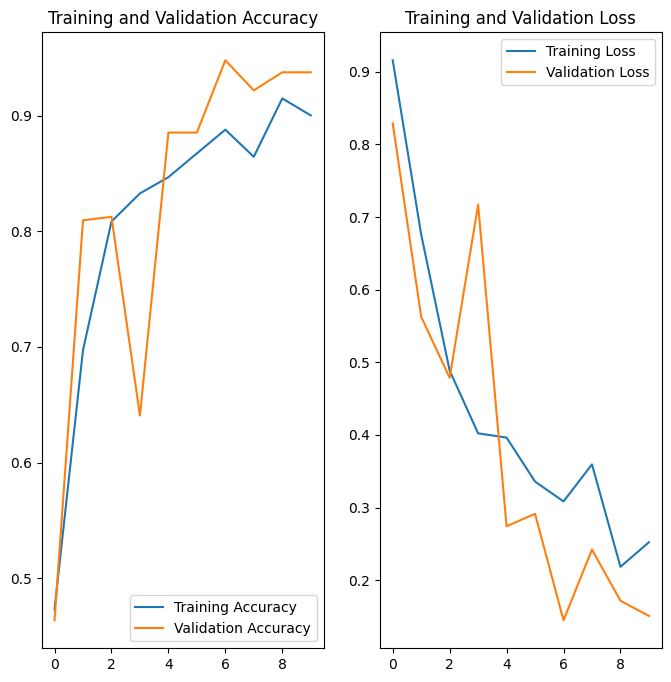

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

In [ ]:
img = image.load_img('/content/Potato_Dataset/Early_Blight/001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178.JPG',target_size =(256,256))

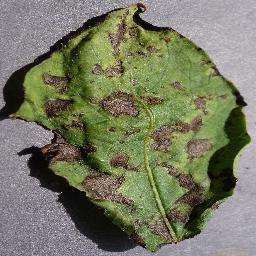

In [ ]:
img

In [ ]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred =np.argmax(model.predict(x))
op =['Early','Healthy','Late']
op[pred]

1/1 [==============================] - 0s 212ms/step


'Early'

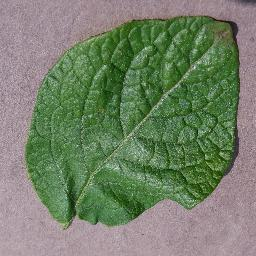

In [ ]:
img = image.load_img('/content/Potato_Dataset/Healthy/0f4ebc5a-d646-436a-919d-961342997cde___RS_HL 4183.JPG',target_size =(256,256))
img

In [ ]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred =np.argmax(model.predict(x))
op =['Early','Healthy','Late']
op[pred]

1/1 [==============================] - 0s 49ms/step


'Healthy'

In [ ]:
model.save('potatos.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
